In [1]:
import pandas as pd

# lyrics_train = pd.read_csv('./data/cleaned_train_lyrics.csv', index_col=False)
# lyrics_test = pd.read_csv('./data/cleaned_test_lyrics.csv', index_col=False)

# lyrics_df = pd.concat([lyrics_train, lyrics_test])

In [2]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import tqdm.auto as tqdm
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import random
from nltk.corpus import stopwords

def remove_stopwords(text):
    global word_freq
    lemmatizer = WordNetLemmatizer()
    stopwords_set = set(stopwords.words('english') + [
        'im','corus', 'verse', 'dont', 'cant', 'oh', 'got', 'come', 'go','chorus','chorus','get', 'gon','na',
        'ill','youre','ive', 'let', 'may', 'wont', 'would', 'aint'
    ])
    remove_stopwords = lambda tokens, stopwords_set : [
        lemmatizer.lemmatize(token) for token in tokens if (
            not token in stopwords_set
            and re.match(r'.*[a-zA-Z]', token)
        )
    ]
    cleaned_text = remove_stopwords(
            word_tokenize(text.lower()), stopwords_set
        )
    if len(cleaned_text) == 0:
        cleaned_text.append("Empty")
        print(cleaned_text)
#     word_freq.update(cleaned_text)
    return ' '.join(cleaned_text)

def get_key_words(lyrics):
    corpus = lyrics
    vectorizer = TfidfVectorizer()

    tfidf_matrix = vectorizer.fit_transform(corpus)

    feature_names = vectorizer.get_feature_names_out()
    top_terms_list =[]
    for i in tqdm.tqdm(range(len(corpus))):
        tfidf_scores = tfidf_matrix[i].toarray().flatten()

        top_indices = np.argsort(tfidf_scores)[::-1][:5]

        top_terms = ", ".join([feature_names[idx] for idx in top_indices if feature_names[idx]])

        top_terms_list.append(top_terms)
    return top_terms_list

In [ ]:
keyword_train_df = None
keyword_test_df = None
for genre in lyrics_df['genre'].unique():
#     word_freq = Counter()
    genre_df = lyrics_df.loc[lyrics_df['genre'] == genre]
    song_lyrics = [remove_stopwords(text) for text in  tqdm.tqdm(genre_df['Lyric'])]
    key_words = get_key_words(song_lyrics)
    if keyword_train_df is None:
        genre_df['keywords'] = key_words
        keyword_train_df = genre_df[:100000].copy()
        keyword_test_df = genre_df[-10000:].copy()
    else:
        genre_df['keywords'] = key_words
        keyword_train_df = pd.concat([keyword_train_df, genre_df[:100000].copy()])
        keyword_test_df = pd.concat([keyword_test_df, genre_df[-10000:].copy()])

  0%|          | 0/110000 [00:00<?, ?it/s]

['Empty']


  0%|          | 0/110000 [00:00<?, ?it/s]

C:\Users\GHOSH\AppData\Local\Temp\ipykernel_42460\990777630.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre_df['keywords'] = key_words


  0%|          | 0/110000 [00:00<?, ?it/s]

['Empty']


  0%|          | 0/110000 [00:00<?, ?it/s]

C:\Users\GHOSH\AppData\Local\Temp\ipykernel_42460\990777630.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre_df['keywords'] = key_words


  0%|          | 0/110000 [00:00<?, ?it/s]

  0%|          | 0/110000 [00:00<?, ?it/s]

C:\Users\GHOSH\AppData\Local\Temp\ipykernel_42460\990777630.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre_df['keywords'] = key_words


  0%|          | 0/110000 [00:00<?, ?it/s]

  0%|          | 0/110000 [00:00<?, ?it/s]

C:\Users\GHOSH\AppData\Local\Temp\ipykernel_42460\990777630.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre_df['keywords'] = key_words


  0%|          | 0/110000 [00:00<?, ?it/s]

  0%|          | 0/110000 [00:00<?, ?it/s]

C:\Users\GHOSH\AppData\Local\Temp\ipykernel_42460\990777630.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre_df['keywords'] = key_words


In [3]:
!pip install datasets peft bitsandbytes trl
!pip install accelerate

In [ ]:
from datasets import Dataset, DatasetDict, load_dataset

# temp_train_df = keyword_train_df[['Lyric', 'genre', 'keywords']]
# temp_test_df = keyword_test_df[['Lyric', 'genre', 'keywords']]

# train_dataset = Dataset.from_pandas(temp_train_df)
# test_dataset = Dataset.from_pandas(temp_test_df)
# dataset = DatasetDict({"train": train_dataset, "test": test_dataset})
dataset = load_dataset("D3STRON/music_lyrics_5k")
dataset

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/500000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/50000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['Lyric', 'genre', 'keywords', '__index_level_0__'],
        num_rows: 500000
    })
    test: Dataset({
        features: ['Lyric', 'genre', 'keywords', '__index_level_0__'],
        num_rows: 50000
    })
})

In [4]:
import transformers
import bitsandbytes as bnb
from transformers import AutoModelForCausalLM , AutoTokenizer
from transformers import pipeline, set_seed
from transformers import get_linear_schedule_with_warmup, AdamW
from transformers import AutoConfig
from transformers import BitsAndBytesConfig
#from lightning.pytorch.loggers import TensorBoardLogger

#Dataset
from datasets import load_dataset

#PEFT
from peft import LoraConfig
from peft import PeftConfig
from peft import PeftModel
from peft import get_peft_model
from peft import prepare_model_for_kbit_training
import torch

import warnings
warnings.filterwarnings("ignore")

torch.set_float32_matmul_precision('medium')
torch.cuda.empty_cache()

In [ ]:
def print_trainable_parameters(model):
    """
    Prints the number of trainable parameters in the model.
    """
    trainable_params = 0
    all_param = 0
    for _, param in model.named_parameters():
        all_param += param.numel()
        if param.requires_grad:
            trainable_params += param.numel()
    print(f"Trainable params: {trainable_params} || All params: {all_param} || Trainable %: {100 * trainable_params / all_param}")

In [5]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
from transformers import AutoTokenizer

# model_name = "microsoft/phi-2"
# tokenizer_name = "microsoft/phi-2"

model_name = "meta-llama/Llama-2-7b-hf"
tokenizer_name = "meta-llama/Llama-2-7b-hf"

# model_name = "D3STRON/multi_genre_music_generator"
# tokenizer_name = "D3STRON/multi_genre_music_generator"

#Bits and Bytes config
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True, #4bit quantizaition - load_in_4bit is used to load models in 4-bit quantization
    bnb_4bit_use_double_quant=True, #nested quantization technique for even greater memory efficiency without sacrificing performance. This technique has proven beneficial, especially when fine-tuning large models
    bnb_4bit_quant_type="nf4", #quantization type used is 4 bit Normal Float Quantization- The NF4 data type is designed for weights initialized using a normal distribution
    bnb_4bit_compute_dtype=torch.bfloat16, #modify the data type used during computation. This can result in speed improvements.
)

model = AutoModelForCausalLM.from_pretrained(model_name,
                                                      device_map="auto",
                                                      trust_remote_code=True,
                                                      quantization_config=bnb_config)


tokenizer = AutoTokenizer.from_pretrained(tokenizer_name)


tokenizer.pad_token = tokenizer.eos_token

tokenizer.add_special_tokens({'pad_token': '<PAD>'})


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [7]:
config_name = "D3STRON/LLAMA_lyric_generator"
# config = PeftConfig.from_pretrained(config_name)
tokenizer = AutoTokenizer.from_pretrained(config_name)


model.load_adapter(config_name)

tokenizer_config.json:   0%|          | 0.00/1.09k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

adapter_config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

adapter_model.safetensors:   0%|          | 0.00/687M [00:00<?, ?B/s]

# Training

In [ ]:
from transformers import TrainingArguments

#Training Parameters
batch_size = 4
output_dir = f"LLama_music_generator"
per_device_train_batch_size = batch_size
gradient_accumulation_steps = 4
optim = 'adamw_hf' #"paged_adamw_32bit" #"paged_adamw_8bit"
save_steps = 10
save_total_limit=3
logging_steps = 10
learning_rate = 1e-5
max_grad_norm = 0.3
warmup_ratio = 0.04
lr_scheduler_type = "constant_with_warmup" #"cosine"
epochs=2

training_arguments = TrainingArguments(
    output_dir=output_dir,
    per_device_train_batch_size=per_device_train_batch_size,
    gradient_accumulation_steps=gradient_accumulation_steps,
    optim=optim,
    num_train_epochs=epochs,
    save_steps=save_steps,
    save_total_limit=save_total_limit,
    logging_steps=logging_steps,
    learning_rate=learning_rate,
    fp16=True,
    save_strategy='steps',
    max_grad_norm=max_grad_norm,
    # max_steps=max_steps,
    warmup_ratio=warmup_ratio,
    lr_scheduler_type=lr_scheduler_type,
    gradient_checkpointing=True,
    push_to_hub=True,
)


In [ ]:
from trl import SFTTrainer

def formatting_func(example):
    text = f"### USER: Generate [{example['genre']}] song lyrics having keywords: {example['keywords']}\n### ASSISTANT: {example['Lyric']}"
    return text

In [ ]:
trainer = SFTTrainer(
    model=model,
    args=training_arguments,
    train_dataset=dataset["test"],
    packing=True,
    #dataset_text_field="id",
    tokenizer=tokenizer,
    max_seq_length=2048,
    formatting_func=formatting_func,
)

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
trainer.train()

Step,Training Loss


KeyboardInterrupt: 

# Load Trained Adapters

In [ ]:
model_name = "meta-llama/Llama-2-7b-hf"
tokenizer_name = "meta-llama/Llama-2-7b-hf"

# model_name = "D3STRON/multi_genre_music_generator"
# tokenizer_name = "D3STRON/multi_genre_music_generator"

#Bits and Bytes config
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True, #4bit quantizaition - load_in_4bit is used to load models in 4-bit quantization
    bnb_4bit_use_double_quant=True, #nested quantization technique for even greater memory efficiency without sacrificing performance. This technique has proven beneficial, especially when fine-tuning large models
    bnb_4bit_quant_type="nf4", #quantization type used is 4 bit Normal Float Quantization- The NF4 data type is designed for weights initialized using a normal distribution
    bnb_4bit_compute_dtype=torch.bfloat16, #modify the data type used during computation. This can result in speed improvements.
)
model = AutoModelForCausalLM.from_pretrained(model_name,
                                                    device_map="auto",
                                                    trust_remote_code=True,
                                                    quantization_config=bnb_config)






config_name = "D3STRON/LLAMA_lyric_generator"

tokenizer = AutoTokenizer.from_pretrained(config_name)
tokenizer.pad_token = tokenizer.eos_token
tokenizer.add_special_tokens({'pad_token': '<PAD>'})
device = 'cuda'

model.load_adapter(config_name)

# Inferance

In [ ]:
import numpy as np


def choose_from_top(probs, cur_ids, n=7, no_rep=2):
    ind = np.argpartition(probs, -n)[-n:]
    top_prob = probs[ind]
    top_prob /= np.sum(top_prob)  # Normalize

    cur_ids_list = cur_ids.squeeze().cpu().numpy().tolist()
    for i in range(100):
        if i <= 5:
            choice = np.random.choice(ind, 1)[0]
        else:
            choice = np.random.choice(ind, 1, p=top_prob)[0]
        n_gram = cur_ids_list[-no_rep + 1 :] + [choice]
        if any(cur_ids_list[i : i + no_rep] == n_gram for i in range(len(cur_ids_list) - no_rep + 1)):
            continue
        return choice
    return np.random.choice(ind, 1, p=top_prob)[0]

def generate_response(genre : str) -> str:
    prompt =  f"""### USER: Generate [{genre}] song lyrics having keywords: flower, garden, fork, car, honey\n### ASSISTANT:""".strip()
    device = 'cuda'
    model.eval()
    cur_ids = tokenizer(prompt, return_tensors="pt").input_ids.to(device)
    with torch.no_grad():
        for i in tqdm.tqdm(range(180)):
            outputs = model(cur_ids)
            logits = outputs['logits']
            softmax_logits = torch.softmax(logits[0,-1], dim=0) #Take the first(from only one in this case) batch and the last predicted embedding
            if i == 5:
                n = 30
            else:
                n = 3
            next_token_id = choose_from_top(softmax_logits.to('cpu').numpy(), cur_ids, n=n) #Randomly(from the topN probability distribution) select the next word
            cur_ids = torch.cat([cur_ids, torch.ones((1,1)).long().to(device) * next_token_id], dim = 1) # Add the last word to the running sequence

            if next_token_id in tokenizer.encode('<|endoflyric|>'):
                joke_finished = True
                break
        output_list = list(cur_ids.squeeze().to('cpu').numpy())
        output_text = tokenizer.decode(output_list)
        print(output_text)

In [ ]:
print(generate_response('country'))

  0%|          | 0/180 [00:00<?, ?it/s]

<s> ### USER: Generate [country] song lyrics having keywords: flower, garden, fork, car, honey
### ASSISTANT: I gotta get out And Im not gassing Im talking bout the gas peddling And I aint got no money for gas And the only way to go Is to get on down the road So if I dont make it back I want to be buried in a garden of flowers And if Im gonna be a flower I wanna bloomin with hurricane winds I wann be the flower in the garden Of love And the car is the wreck And the honeymakers are the fork And the fork in my eye Is the reason Im driving down this highway And I got a long way And the only thing that Im thinking is how far I can make this thing run And I got my hands full And Im not talking about a cup And Im not looking for a hand full Of money Im just trying to make a doll Full And if you wan to know what its
None


# Evaluate

In [ ]:
from torch.utils.data import Dataset, DataLoader
from tqdm.auto import tqdm

lyrics_test_df = pd.read_csv('./keyword_lyrics_test.csv')

class LyricsDataset(Dataset):
    def __init__(self, lyrics_df):
        super().__init__()


        self.lyric_list = []

        for lyric, genre, keyword in tqdm(zip(lyrics_df['Lyric'], lyrics_df['genre'], lyrics_df['keywords']), total=len(lyrics_df['genre'])):
            lyric_str = f"### USER: Generate [{genre}] song lyrics having keywords: {keyword}\n### ASSISTANT: {lyric}"
#             lyric_str = f"LYRIC:{lyric}{self.end_of_text_token}"
            self.lyric_list.append(lyric_str)

    def __len__(self):
        return len(self.lyric_list)

    def __getitem__(self, item):
        return self.lyric_list[item]

test_data = LyricsDataset(lyrics_test_df)
test_loader = DataLoader(test_data, batch_size=1, shuffle=True)


def evaluate(model, tokenizer, test_loader):
    model.eval()
    nlls = []
    device = 'cuda'
    EVAL_STEPS = 1000
    steps = 0
    for lyric in tqdm(test_loader):
        lyric_tens = tokenizer(lyric, padding=True, truncation= True, return_tensors='pt')['input_ids'].to(device)
        target_tens = lyric_tens.clone()
        with torch.no_grad():
            outputs = model(lyric_tens, labels=target_tens)
            neg_log_likelihood = outputs.loss
            nlls.append(neg_log_likelihood)
        if EVAL_STEPS == steps:
            steps = 0
            ppl = torch.exp(torch.stack(nlls).mean())
            print("Evaluations:", ppl.item())
        steps += 1

In [ ]:
evaluate(model, tokenizer, test_loader)

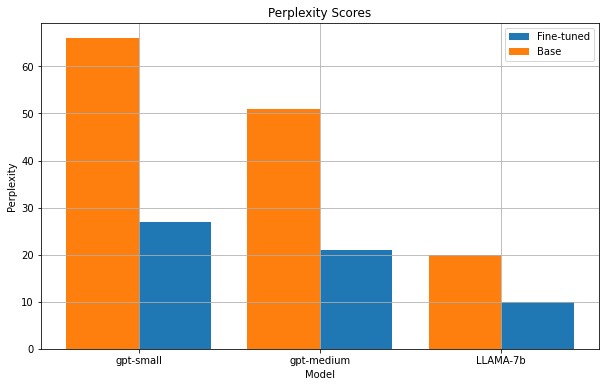

In [26]:
import matplotlib.pyplot as plt

# Define the dictionaries
fine_tuned = {
    'gpt-small': 27,
    'gpt-medium': 21,
    'LLAMA-7b': 10
}

base = {
    'gpt-small': 66,
    'gpt-medium': 51,
    'LLAMA-7b': 20
}

# Plotting
plt.figure(figsize=(10, 6))

# Plot fine-tuned model
plt.bar([x + 0.2 for x in range(len(fine_tuned))], fine_tuned.values(), width=0.4, label='Fine-tuned')

# Plot base model
plt.bar([x - 0.2 for x in range(len(base))], base.values(), width=0.4, label='Base')

# Add x-axis labels
plt.xticks(range(len(fine_tuned)), fine_tuned.keys())

# Add title and labels
plt.title('Perplexity Scores')
plt.xlabel('Model')
plt.ylabel('Perplexity')

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()


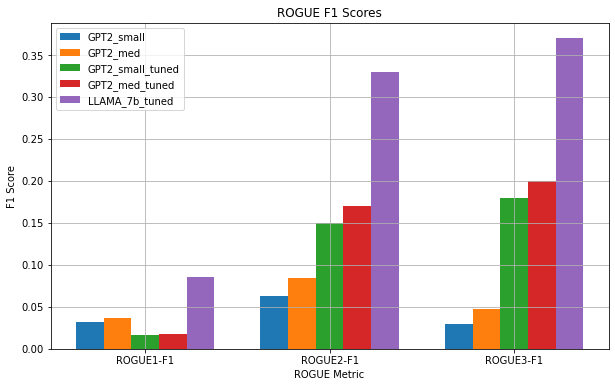

In [29]:
import matplotlib.pyplot as plt
import numpy as np

GPT2_small = {
    'ROGUE1-F1': 0.032,
    'ROGUE2-F1': 0.063,
    'ROGUE3-F1': 0.03
}

GPT2_med = {
    'ROGUE1-F1': 0.037,
    'ROGUE2-F1': 0.084,
    'ROGUE3-F1': 0.047
}

GPT2_small_tuned = {
    'ROGUE1-F1': 0.016,
    'ROGUE2-F1': 0.15,
    'ROGUE3-F1': 0.18
}

GPT2_med_tuned = {
    'ROGUE1-F1': 0.018,
    'ROGUE2-F1': 0.17,
    'ROGUE3-F1': 0.20
}

LLAMA_7b_tuned = {
    'ROGUE1-F1': 0.086,
    'ROGUE2-F1': 0.33,
    'ROGUE3-F1': 0.37
}

# Define the x-axis labels
labels = list(GPT2_small.keys())

# Define the x-axis positions for each group
x = np.arange(len(labels))

# Define the width of the bars
width = 0.15

# Plotting
plt.figure(figsize=(10, 6))

# Plot each dictionary as a group of bars
plt.bar(x - 2*width, list(GPT2_small.values()), width=width, label='GPT2_small')
plt.bar(x - width, list(GPT2_med.values()), width=width, label='GPT2_med')
plt.bar(x, list(GPT2_small_tuned.values()), width=width, label='GPT2_small_tuned')
plt.bar(x + width, list(GPT2_med_tuned.values()), width=width, label='GPT2_med_tuned')
plt.bar(x + 2*width, list(LLAMA_7b_tuned.values()), width=width, label='LLAMA_7b_tuned')

# Add title and labels
plt.title('ROGUE F1 Scores')
plt.xlabel('ROGUE Metric')
plt.ylabel('F1 Score')
plt.xticks(x, labels)

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()
